<a href="https://colab.research.google.com/github/NP-15/Deep-Learning/blob/main/Lab-03%3A%20Gradient%20Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Experiment-1

In [1]:
import numpy as np

In [2]:
X = np.array([
    [1, 1],
    [1, 2],
    [1, 3],
    [1, 4]
])
y = np.array([2, 3, 4, 5])

In [3]:
# Here we initialize the weight(parameter)
def initialize_theta(D):
    return np.random.randn(D) * 0.01
    #return np.zeros([D,1])
# Linear function for prediction

def linear_function(X, theta):
  return np.dot(X, theta.T)

# Mean squared error
def mean_squared_error(y, y_pred):
    return np.mean((y - y_pred) ** 2)

# Batch gradient computation
def batch_gradient(X, y, theta):
    N = X.shape[0]
    y_pred = linear_function(X, theta)
    error = y_pred - y
    gradient = (2 / N) * np.dot(X.T, error)
    return gradient

# Update function
def update_function(theta, grads, step_size):
    return theta - step_size * grads

In [4]:
def train_batch_gradient_descent(X, y, num_epochs, step_size=0.1, plot_every=1):
  N, D = X.shape
  theta = initialize_theta(D)
  losses = []
  for epoch in range(num_epochs):
    ypred = linear_function(X, theta)
    loss = mean_squared_error(y, ypred)
    grads = batch_gradient(X, y, theta)
    theta = update_function(theta, grads, step_size)
    losses.append(loss)
    print(f"\nEpoch {epoch}, loss {loss}")
  return losses

In [5]:
num_epochs = 20
step_size = 0.01
losses = train_batch_gradient_descent(X, y, num_epochs, step_size)


Epoch 0, loss 13.296001992936619

Epoch 1, loss 9.243697194556214

Epoch 2, loss 6.431781716102764

Epoch 3, loss 4.480546781684297

Epoch 4, loss 3.126520501811938

Epoch 5, loss 2.186885303140565

Epoch 6, loss 1.534787935826085

Epoch 7, loss 1.0822076100243816

Epoch 8, loss 0.768068558285844

Epoch 9, loss 0.5499915941166571

Epoch 10, loss 0.39857069298587033

Epoch 11, loss 0.2934016329828703

Epoch 12, loss 0.22032635259596903

Epoch 13, loss 0.16952086887905263

Epoch 14, loss 0.13416852432334722

Epoch 15, loss 0.10953938093321174

Epoch 16, loss 0.09235143125349472

Epoch 17, loss 0.0803273562168644

Epoch 18, loss 0.07188696879211465

Epoch 19, loss 0.06593380713891332


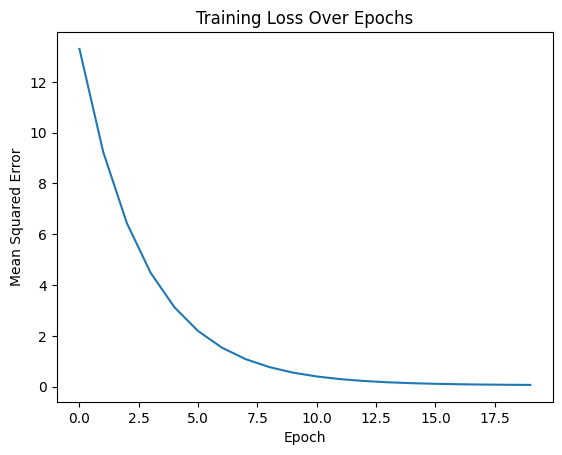

In [6]:
import matplotlib.pyplot as plt

plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss Over Epochs')
plt.show()

## Experiment-2

In [7]:
def quadratic_function(X, theta):
    v = np.dot(X, theta)
    return v**2

def initialize_theta(D):
    return np.random.randn(D) * 0.01
    #return np.zeros([D,1])

def quadratic_gradient(X, y, theta):
    N = X.shape[0]
    v = np.dot(X, theta)
    dv = 2 * v
    gradient = (2 / N) * np.dot(X.T, (quadratic_function(X, theta) - y) * dv)
    return gradient

def train_batch_gradient_descent(X, y, num_epochs, step_size=0.1, plot_every=1):
    N, D = X.shape
    theta = initialize_theta(D)
    losses = []
    for epoch in range(num_epochs):
        y_pred = quadratic_function(X, theta)
        loss = mean_squared_error(y, y_pred)
        grads = quadratic_gradient(X, y, theta)
        theta = update_function(theta, grads, step_size)
        losses.append(loss)
        if epoch % plot_every == 0:
            print(f"Epoch {epoch}, loss {loss}")
    return theta, losses


Epoch 0, loss 13.498494307082309
Epoch 1, loss 13.498279887034144
Epoch 2, loss 13.498000790205452
Epoch 3, loss 13.497637283970395
Epoch 4, loss 13.497163616405249
Epoch 5, loss 13.496546181433136
Epoch 6, loss 13.495741125589014
Epoch 7, loss 13.494691227153616
Epoch 8, loss 13.49332182758447
Epoch 9, loss 13.491535529435884
Epoch 10, loss 13.489205290175958
Epoch 11, loss 13.486165432381057
Epoch 12, loss 13.482199951567665
Epoch 13, loss 13.477027326234927
Epoch 14, loss 13.470280812616945
Epoch 15, loss 13.461482931272752
Epoch 16, loss 13.450012517729693
Epoch 17, loss 13.435062313606576
Epoch 18, loss 13.415584627532239
Epoch 19, loss 13.390222127783716
Epoch 20, loss 13.357220411528804
Epoch 21, loss 13.314318769061654
Epoch 22, loss 13.25861578302661
Epoch 23, loss 13.186407520133926
Epoch 24, loss 13.092998828274228
Epoch 25, loss 12.972493814249313
Epoch 26, loss 12.817581676725915
Epoch 27, loss 12.619351043483558
Epoch 28, loss 12.367192500618966
Epoch 29, loss 12.04888714

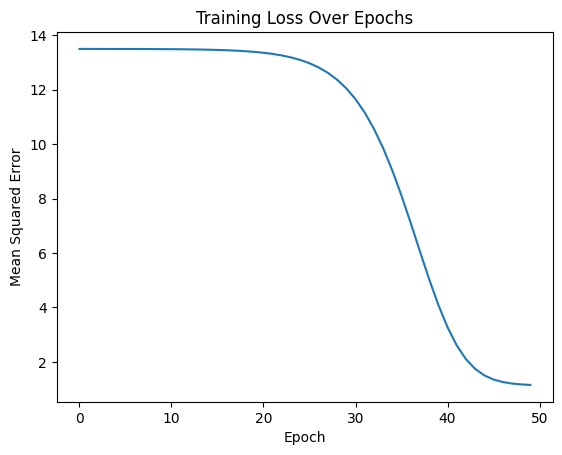

In [8]:
# Training the model
num_epochs = 50
step_size = 0.001
_, losses = train_batch_gradient_descent(X, y, num_epochs, step_size)

# Optionally, plot the losses
import matplotlib.pyplot as plt
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss Over Epochs')
plt.show()


## Experiment-3

In [9]:
def per_sample_gradient(xi, yi, theta):
  return -2.0 * xi * (yi - linear_function(xi, theta))

def shuffle_data(X, y):
  N, _ = X.shape
  shuffled_idx = np.random.permutation(N)
  return X[shuffled_idx], y[shuffled_idx]

def train_with_sgd(X, y, num_epochs, step_size, plot_every=1):
  """Train with stochastic gradient descent"""
  N, D = X.shape
  theta = initialize_theta(D)
  losses = []
  epoch = 0
  loss_tolerance = 0.001
  avg_loss = float("inf")
  while epoch < num_epochs and avg_loss > loss_tolerance:
    running_loss = 0.0
    shuffled_x, shuffled_y = shuffle_data(X, y)
    #count = 0
    for idx in range(shuffled_x.shape[0]):
      sample_x = shuffled_x[idx].reshape(-1, D)
      sample_y = shuffled_y[idx].reshape(-1, 1)
      ypred = linear_function(sample_x, theta)
      loss = mean_squared_error(sample_y, ypred)
      running_loss += loss
      grads = per_sample_gradient(sample_x, sample_y, theta)
      theta = update_function(theta, grads, step_size)
      #count += 1
      #print(count)
    avg_loss = running_loss/ X.shape[0]
    losses.append(avg_loss)
    print(f"Epoch {epoch}, loss {avg_loss}")
    epoch += 1
  return losses


Epoch 0, loss 8.810191031903608
Epoch 1, loss 1.9444075048826726
Epoch 2, loss 0.438256116006782
Epoch 3, loss 0.1329299524650122
Epoch 4, loss 0.0750707736147622
Epoch 5, loss 0.06391331111010132
Epoch 6, loss 0.05963257540874352
Epoch 7, loss 0.058138206704107784
Epoch 8, loss 0.056460649521459884
Epoch 9, loss 0.055505208968401845


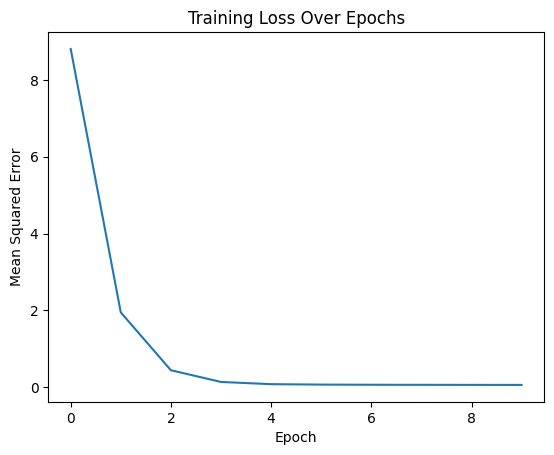

In [10]:
# Training the model
num_epochs = 10
step_size = 0.01
losses = train_with_sgd(X, y, num_epochs, step_size)

# Optionally, plot the losses
import matplotlib.pyplot as plt
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss Over Epochs')
plt.show()


## Experiment-4

In [11]:
def get_momentum(momentum, grad, beta):
  return beta * momentum + (1. - beta) * grad

def train_sgd_with_momentum(X, y, num_epochs, step_size, beta, plot_every=1):
  """Train with stochastic gradient descent"""
  N, D = X.shape
  theta = initialize_theta(D)
  losses = []
  epoch = 0
  loss_tolerance = 0.001
  avg_loss = float("inf")
  while epoch < num_epochs:
    momentum = 0.0
    running_loss = 0.0
    shuffled_x, shuffled_y = shuffle_data(X, y)
    for idx in range(shuffled_x.shape[0]):
      sample_x = shuffled_x[idx].reshape(-1, D)
      sample_y = shuffled_y[idx].reshape(-1, 1)
      ypred = linear_function(sample_x, theta)
      loss = mean_squared_error(sample_y, ypred)
      running_loss += loss
      grad = per_sample_gradient(sample_x, sample_y, theta)
      momentum = get_momentum(momentum, grad, beta)
      theta = update_function(theta, momentum, step_size)
    avg_loss = running_loss/ X.shape[0]
    losses.append(avg_loss)
    print(f"Epoch {epoch}, loss {avg_loss}")
    epoch += 1
  return losses


Epoch 0, loss 12.822453996318915
Epoch 1, loss 8.596672973535638
Epoch 2, loss 6.119365992991838
Epoch 3, loss 4.322209336528297
Epoch 4, loss 3.0280479700450513
Epoch 5, loss 2.360686567138617
Epoch 6, loss 1.654542964276898
Epoch 7, loss 1.1304332621204858
Epoch 8, loss 0.8837375522707852
Epoch 9, loss 0.6575669480282915
Epoch 10, loss 0.5197673988172504
Epoch 11, loss 0.4052009324092678
Epoch 12, loss 0.32070104630817375
Epoch 13, loss 0.24277128517517038
Epoch 14, loss 0.18783449077441894
Epoch 15, loss 0.15174148411882882
Epoch 16, loss 0.12414763013510652
Epoch 17, loss 0.10629648866504936
Epoch 18, loss 0.09153735244854252
Epoch 19, loss 0.0821965745857782
Epoch 20, loss 0.07453312116691638
Epoch 21, loss 0.06831560060665921
Epoch 22, loss 0.06255195651141338
Epoch 23, loss 0.06075159859762934
Epoch 24, loss 0.05766435650577751
Epoch 25, loss 0.05638482794564104
Epoch 26, loss 0.053833707898127595
Epoch 27, loss 0.05324966502296907
Epoch 28, loss 0.053417601077625575
Epoch 29, l

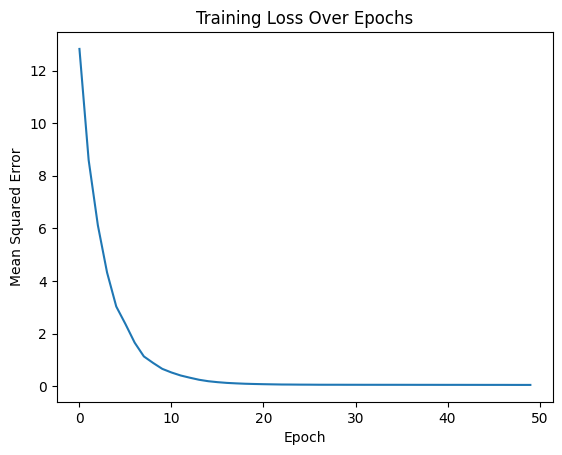

In [12]:
# Training the model
num_epochs = 50
step_size = 0.01
beta = 0.9
losses = train_sgd_with_momentum(X, y, num_epochs, step_size, beta)
# Optionally, plot the losses
import matplotlib.pyplot as plt
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss Over Epochs')
plt.show()


## Experiment-5

In [13]:
def minibatch_gradient_descent(X, y, num_epochs, step_size=0.1, batch_size=2, plot_every=1):
  N, D = X.shape
  theta = initialize_theta(D)
  losses = []
  num_batches = N//batch_size
  X, y = shuffle_data(X, y)
  for epoch in range(num_epochs):
    running_loss = 0.0
    count = 0
    for batch_idx in range(0, N, batch_size):
      x_batch = X[batch_idx: batch_idx + batch_size]
      y_batch = y[batch_idx: batch_idx + batch_size]
      ypred = linear_function(x_batch, theta)
      loss = mean_squared_error(y_batch, ypred)
      grads = batch_gradient(x_batch, y_batch, theta)
      theta = update_function(theta, grads, step_size)
      running_loss += (loss * x_batch.shape[0])


      count += 1
      print(count)
    avg_loss = running_loss/ N
    losses.append(avg_loss)
    print(f"\nEpoch {epoch}, loss {avg_loss}")
  return losses

1
2

Epoch 0, loss 11.16539473356087
1
2

Epoch 1, loss 1.3993748083029653
1
2

Epoch 2, loss 0.13189639395657995
1
2

Epoch 3, loss 0.09433593187878966
1
2

Epoch 4, loss 0.1473494163623477
1
2

Epoch 5, loss 0.16493073509441297
1
2

Epoch 6, loss 0.15765012772603684
1
2

Epoch 7, loss 0.1406376095588728
1
2

Epoch 8, loss 0.12160332720110888
1
2

Epoch 9, loss 0.1036388791183572


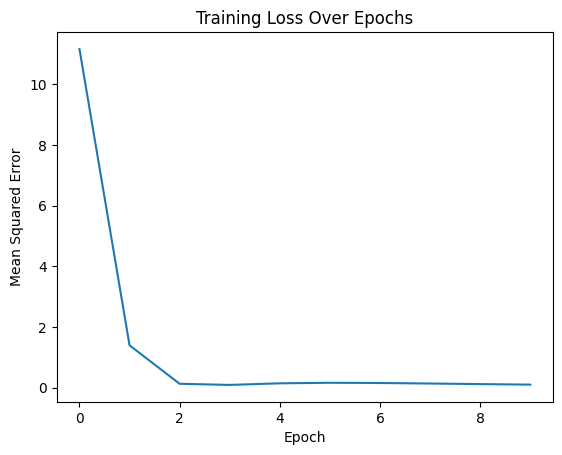

In [14]:
# Training the model
num_epochs = 10
step_size = 0.01
beta = 0.9
losses = minibatch_gradient_descent(X, y, num_epochs)

# Optionally, plot the losses
import matplotlib.pyplot as plt
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss Over Epochs')
plt.show()

## Experiment-6

In [15]:
def linear_function(X, theta):
    return np.dot(X, theta)

def linear_gradient(X, y, theta):
    N = X.shape[0]
    y_pred = linear_function(X, theta)
    error = y_pred - y
    gradient = (2 / N) * np.dot(X.T, error)
    return gradient

def train_batch_gradient_descent(X, y, num_epochs, step_size=0.01):
    N, D = X.shape
    theta = initialize_theta(D)
    losses = []
    for epoch in range(num_epochs):
        y_pred = linear_function(X, theta)
        loss = mean_squared_error(y, y_pred)
        grads = linear_gradient(X, y, theta)
        theta = update_function(theta, grads, step_size)
        losses.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    return theta, losses

# Initialize theta
def initialize_theta(D):
    return np.random.randn(D) * 0.01

# Update function
def update_function(theta, grads, step_size):
    return theta - step_size * grads

# Mean squared error function
def mean_squared_error(y, y_pred):
    return np.mean((y - y_pred) ** 2)

In [16]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

diamonds = sns.load_dataset('diamonds')

X = diamonds[['carat']].values
y = diamonds['price'].values
y_normalized = y / max(y)

X = np.c_[np.ones(X.shape[0]), X]

Epoch 0, Loss: 0.09093872937997582
Epoch 10, Loss: 0.057147077468915085
Epoch 20, Loss: 0.04000426201302141
Epoch 30, Loss: 0.03111085428766717
Epoch 40, Loss: 0.026315210396510205
Epoch 50, Loss: 0.023564749208363916
Epoch 60, Loss: 0.021844177592390004
Epoch 70, Loss: 0.020650821112124913
Epoch 80, Loss: 0.01973536073107736
Epoch 90, Loss: 0.01897371766478069
Epoch 100, Loss: 0.018303744046224556
Epoch 110, Loss: 0.017693936926205488
Epoch 120, Loss: 0.017127976433226832
Epoch 130, Loss: 0.016597083409166984
Epoch 140, Loss: 0.016096241072142158
Epoch 150, Loss: 0.015622326151722276
Epoch 160, Loss: 0.015173183665709616
Epoch 170, Loss: 0.014747168077110623
Epoch 180, Loss: 0.014342914992389528
Epoch 190, Loss: 0.01395922685907258
Epoch 200, Loss: 0.01359501507052482
Epoch 210, Loss: 0.013249270015419435
Epoch 220, Loss: 0.01292104500379376
Epoch 230, Loss: 0.012609447114621053
Epoch 240, Loss: 0.012313631524844213
Epoch 250, Loss: 0.012032797616897403
Epoch 260, Loss: 0.011766186020

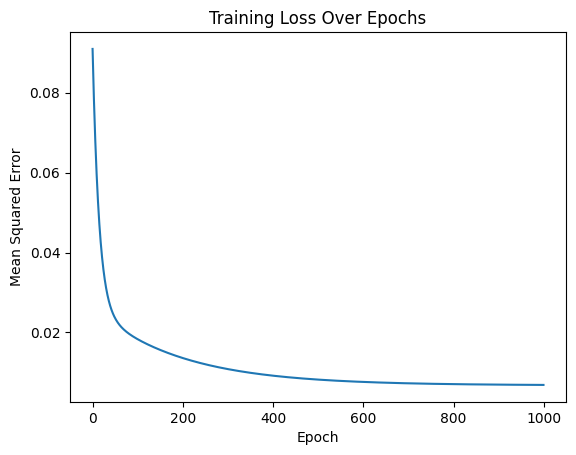

In [17]:
# Set training parameters
num_epochs = 1000
step_size = 0.01

# Train the model
theta, losses = train_batch_gradient_descent(X, y_normalized, num_epochs, step_size)

# Plot the loss over epochs
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss Over Epochs')
plt.show()

### Question-1

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Function and its derivative
def f(x):
    return x**4 - 5*x**2 - 3*x

def f_prime(x):
    return 4*x**3 - 10*x - 3

Epoch 1: x = -0.31067, f(x) = 0.45875
Epoch 2: x = -0.31054, f(x) = 0.45874
Epoch 3: x = -0.31040, f(x) = 0.45874
Epoch 4: x = -0.31024, f(x) = 0.45874
Epoch 5: x = -0.31007, f(x) = 0.45874
Epoch 6: x = -0.30989, f(x) = 0.45873
Epoch 7: x = -0.30969, f(x) = 0.45873
Epoch 8: x = -0.30947, f(x) = 0.45872
Epoch 9: x = -0.30923, f(x) = 0.45872
Epoch 10: x = -0.30897, f(x) = 0.45871
Epoch 11: x = -0.30868, f(x) = 0.45870
Epoch 12: x = -0.30838, f(x) = 0.45869
Epoch 13: x = -0.30804, f(x) = 0.45868
Epoch 14: x = -0.30768, f(x) = 0.45867
Epoch 15: x = -0.30728, f(x) = 0.45865
Epoch 16: x = -0.30685, f(x) = 0.45863
Epoch 17: x = -0.30637, f(x) = 0.45861
Epoch 18: x = -0.30586, f(x) = 0.45858
Epoch 19: x = -0.30530, f(x) = 0.45855
Epoch 20: x = -0.30469, f(x) = 0.45851
Epoch 21: x = -0.30403, f(x) = 0.45846
Epoch 22: x = -0.30331, f(x) = 0.45841
Epoch 23: x = -0.30253, f(x) = 0.45834
Epoch 24: x = -0.30167, f(x) = 0.45827
Epoch 25: x = -0.30074, f(x) = 0.45818
Epoch 26: x = -0.29973, f(x) = 0.4

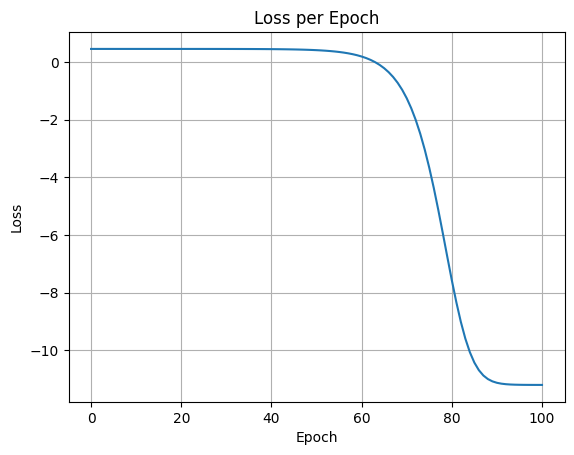

In [19]:
alpha = 0.01
epochs = 100
x = np.random.randn()

x_values = [x]
losses = [f(x)]

for i in range(epochs):
    gradient = f_prime(x)
    x = x - alpha * gradient
    loss = f(x)
    x_values.append(x)
    losses.append(loss)

    print(f'Epoch {i+1}: x = {x:.5f}, f(x) = {loss:.5f}')

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.grid(True)
plt.show()

### Question-2


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Function and its derivative
def f(x):
    return x**4 - 5*x**2 - 3*x

def f_prime(x):
    return 4*x**3 - 10*x - 3

# Learning rate schedules
def step_decay(initial_lr, epoch, drop_rate=0.5, epochs_drop=10):
    return initial_lr * (drop_rate ** np.floor(epoch / epochs_drop))

def exponential_decay(initial_lr, epoch, k=0.1):
    return initial_lr * np.exp(-k * epoch)

def inverse_time_decay(initial_lr, epoch, k=1.0):
    return initial_lr / (1 + k * epoch)

initial_lr = 0.01
epochs = 100
x = np.random.randn()

Epoch 1: x = -0.18176, f(x) = 0.38119, lr = 0.01000
Epoch 2: x = -0.17085, f(x) = 0.36745, lr = 0.00905
Epoch 3: x = -0.16011, f(x) = 0.35281, lr = 0.00819
Epoch 4: x = -0.14962, f(x) = 0.33744, lr = 0.00741
Epoch 5: x = -0.13946, f(x) = 0.32150, lr = 0.00670
Epoch 6: x = -0.12965, f(x) = 0.30519, lr = 0.00607
Epoch 7: x = -0.12025, f(x) = 0.28867, lr = 0.00549
Epoch 8: x = -0.11129, f(x) = 0.27210, lr = 0.00497
Epoch 9: x = -0.10279, f(x) = 0.25565, lr = 0.00449
Epoch 10: x = -0.09476, f(x) = 0.23945, lr = 0.00407
Epoch 11: x = -0.08719, f(x) = 0.22362, lr = 0.00368
Epoch 12: x = -0.08010, f(x) = 0.20826, lr = 0.00333
Epoch 13: x = -0.07347, f(x) = 0.19345, lr = 0.00301
Epoch 14: x = -0.06729, f(x) = 0.17926, lr = 0.00273
Epoch 15: x = -0.06155, f(x) = 0.16572, lr = 0.00247
Epoch 16: x = -0.05623, f(x) = 0.15289, lr = 0.00223
Epoch 17: x = -0.05130, f(x) = 0.14076, lr = 0.00202
Epoch 18: x = -0.04676, f(x) = 0.12935, lr = 0.00183
Epoch 19: x = -0.04257, f(x) = 0.11866, lr = 0.00165
Ep

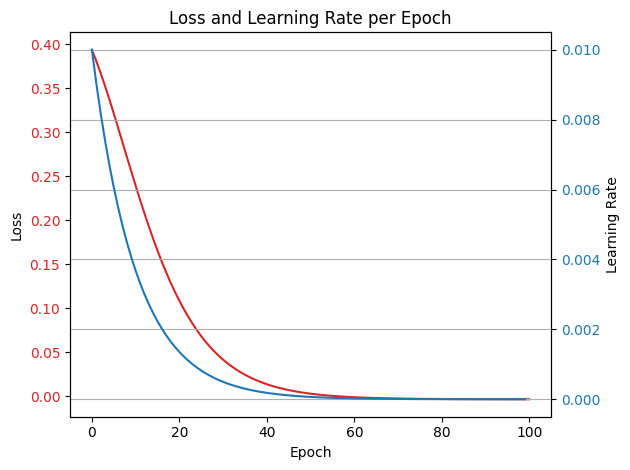

In [21]:
x_values = [x]
losses = [f(x)]
lrs = []

for epoch in range(epochs):
    lr = exponential_decay(initial_lr, epoch)

    gradient = f_prime(x)
    x = x - lr * gradient
    loss = f(x)

    x_values.append(x)
    losses.append(loss)
    lrs.append(lr)

    print(f'Epoch {epoch+1}: x = {x:.5f}, f(x) = {loss:.5f}, lr = {lr:.5f}')

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(losses, label='Loss', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Learning Rate')
ax2.plot(lrs, label='Learning Rate', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Loss and Learning Rate per Epoch')
fig.tight_layout()
plt.grid(True)
plt.show()

Epoch 1: x = 0.03115, f(x) = -0.09829, lr = 0.01000
Epoch 2: x = 0.06426, f(x) = -0.21341, lr = 0.01000
Epoch 3: x = 0.10067, f(x) = -0.35260, lr = 0.01000
Epoch 4: x = 0.14070, f(x) = -0.52070, lr = 0.01000
Epoch 5: x = 0.18466, f(x) = -0.72332, lr = 0.01000
Epoch 6: x = 0.23287, f(x) = -0.96683, lr = 0.01000
Epoch 7: x = 0.28566, f(x) = -1.25831, lr = 0.01000
Epoch 8: x = 0.34329, f(x) = -1.60522, lr = 0.01000
Epoch 9: x = 0.40600, f(x) = -2.01501, lr = 0.01000
Epoch 10: x = 0.47392, f(x) = -2.49434, lr = 0.01000
Epoch 11: x = 0.51049, f(x) = -2.76657, lr = 0.00500
Epoch 12: x = 0.54836, f(x) = -3.05811, lr = 0.00500
Epoch 13: x = 0.58748, f(x) = -3.36895, lr = 0.00500
Epoch 14: x = 0.62779, f(x) = -3.69867, lr = 0.00500
Epoch 15: x = 0.66923, f(x) = -4.04649, lr = 0.00500
Epoch 16: x = 0.71170, f(x) = -4.41114, lr = 0.00500
Epoch 17: x = 0.75508, f(x) = -4.79088, lr = 0.00500
Epoch 18: x = 0.79922, f(x) = -5.18343, lr = 0.00500
Epoch 19: x = 0.84397, f(x) = -5.58600, lr = 0.00500
Ep

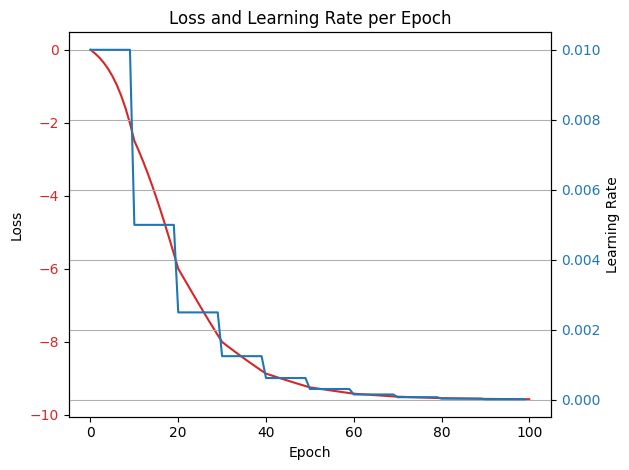

In [22]:
x_values = [x]
losses = [f(x)]
lrs = []

for epoch in range(epochs):
    lr = step_decay(initial_lr, epoch)

    gradient = f_prime(x)
    x = x - lr * gradient
    loss = f(x)

    x_values.append(x)
    losses.append(loss)
    lrs.append(lr)

    print(f'Epoch {epoch+1}: x = {x:.5f}, f(x) = {loss:.5f}, lr = {lr:.5f}')

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(losses, label='Loss', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Learning Rate')
ax2.plot(lrs, label='Learning Rate', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Loss and Learning Rate per Epoch')
fig.tight_layout()
plt.grid(True)
plt.show()

Epoch 1: x = 1.38156, f(x) = -10.04508, lr = 0.01000
Epoch 2: x = 1.41290, f(x) = -10.23499, lr = 0.00500
Epoch 3: x = 1.43239, f(x) = -10.34624, lr = 0.00333
Epoch 4: x = 1.44631, f(x) = -10.42232, lr = 0.00250
Epoch 5: x = 1.45704, f(x) = -10.47894, lr = 0.00200
Epoch 6: x = 1.46570, f(x) = -10.52338, lr = 0.00167
Epoch 7: x = 1.47293, f(x) = -10.55957, lr = 0.00143
Epoch 8: x = 1.47911, f(x) = -10.58985, lr = 0.00125
Epoch 9: x = 1.48450, f(x) = -10.61572, lr = 0.00111
Epoch 10: x = 1.48926, f(x) = -10.63819, lr = 0.00100
Epoch 11: x = 1.49351, f(x) = -10.65795, lr = 0.00091
Epoch 12: x = 1.49735, f(x) = -10.67554, lr = 0.00083
Epoch 13: x = 1.50085, f(x) = -10.69132, lr = 0.00077
Epoch 14: x = 1.50405, f(x) = -10.70560, lr = 0.00071
Epoch 15: x = 1.50701, f(x) = -10.71862, lr = 0.00067
Epoch 16: x = 1.50975, f(x) = -10.73054, lr = 0.00063
Epoch 17: x = 1.51229, f(x) = -10.74153, lr = 0.00059
Epoch 18: x = 1.51468, f(x) = -10.75169, lr = 0.00056
Epoch 19: x = 1.51691, f(x) = -10.761

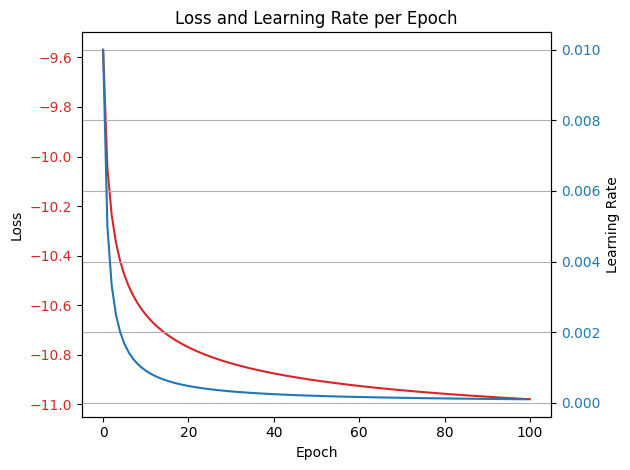

In [23]:
x_values = [x]
losses = [f(x)]
lrs = []

for epoch in range(epochs):
    lr = inverse_time_decay(initial_lr, epoch)

    gradient = f_prime(x)
    x = x - lr * gradient
    loss = f(x)

    x_values.append(x)
    losses.append(loss)
    lrs.append(lr)

    print(f'Epoch {epoch+1}: x = {x:.5f}, f(x) = {loss:.5f}, lr = {lr:.5f}')

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(losses, label='Loss', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Learning Rate')
ax2.plot(lrs, label='Learning Rate', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Loss and Learning Rate per Epoch')
fig.tight_layout()
plt.grid(True)
plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Function and its derivative
def f(x):
    return x**4 - 5*x**2 - 3*x

def f_prime(x):
    return 4*x**3 - 10*x - 3

# Gradient descent parameters
epochs = 100
x = np.random.randn()
alpha = 0.01

Epoch 1: x = -0.84912, f(x) = -0.53781, lr = 0.00330
Epoch 2: x = -0.85912, f(x) = -0.56831, lr = 0.00329
Epoch 3: x = -0.86912, f(x) = -0.59892, lr = 0.00329
Epoch 4: x = -0.87913, f(x) = -0.62963, lr = 0.00328
Epoch 5: x = -0.88914, f(x) = -0.66042, lr = 0.00328
Epoch 6: x = -0.89915, f(x) = -0.69127, lr = 0.00327
Epoch 7: x = -0.90916, f(x) = -0.72215, lr = 0.00327
Epoch 8: x = -0.91917, f(x) = -0.75305, lr = 0.00326
Epoch 9: x = -0.92919, f(x) = -0.78394, lr = 0.00326
Epoch 10: x = -0.93920, f(x) = -0.81480, lr = 0.00326
Epoch 11: x = -0.94922, f(x) = -0.84559, lr = 0.00326
Epoch 12: x = -0.95923, f(x) = -0.87630, lr = 0.00326
Epoch 13: x = -0.96924, f(x) = -0.90690, lr = 0.00326
Epoch 14: x = -0.97925, f(x) = -0.93735, lr = 0.00326
Epoch 15: x = -0.98925, f(x) = -0.96763, lr = 0.00326
Epoch 16: x = -0.99924, f(x) = -0.99771, lr = 0.00327
Epoch 17: x = -1.00922, f(x) = -1.02756, lr = 0.00327
Epoch 18: x = -1.01918, f(x) = -1.05715, lr = 0.00327
Epoch 19: x = -1.02913, f(x) = -1.086

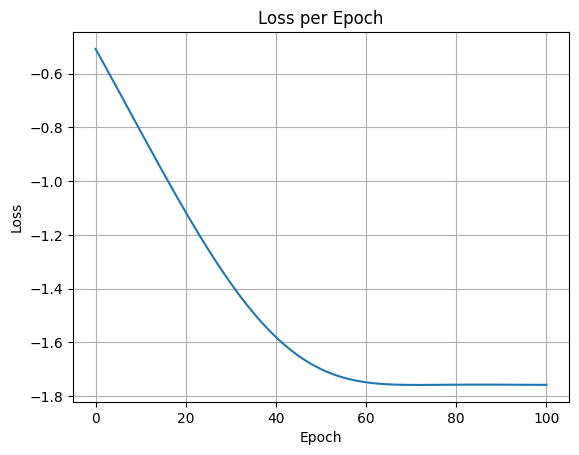

In [25]:
# Choose the optimizer
optimizer = 'adam'

# Adagrad parameters
epsilon = 1e-8
grad_squared_sum = 0

# RMSprop parameters
rho = 0.9
grad_squared_avg = 0

# Adam parameters
beta1 = 0.9
beta2 = 0.999
m = 0  # First moment estimate
v = 0  # Second moment estimate
t = 0  # Time step

# Lists to store values for plotting
x_values = [x]
losses = [f(x)]

# Gradient descent loop
for epoch in range(epochs):
    gradient = f_prime(x)

    if optimizer == 'adagrad':
        grad_squared_sum += gradient**2
        adjusted_lr = alpha / (np.sqrt(grad_squared_sum) + epsilon)

    elif optimizer == 'rmsprop':
        grad_squared_avg = rho * grad_squared_avg + (1 - rho) * gradient**2
        adjusted_lr = alpha / (np.sqrt(grad_squared_avg) + epsilon)

    elif optimizer == 'adam':
        t += 1
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * gradient**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        adjusted_lr = alpha / (np.sqrt(v_hat) + epsilon)
        x -= adjusted_lr * m_hat
        loss = f(x)
        x_values.append(x)
        losses.append(loss)
        print(f'Epoch {epoch+1}: x = {x:.5f}, f(x) = {loss:.5f}, lr = {adjusted_lr:.5f}')
        continue

    # Update x
    x -= adjusted_lr * gradient
    loss = f(x)

    # Store values for plotting
    x_values.append(x)
    losses.append(loss)

    # Print the progress
    print(f'Epoch {epoch+1}: x = {x:.5f}, f(x) = {loss:.5f}, lr = {adjusted_lr:.5f}')

# Plotting the losses
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.grid(True)
plt.show()

Epoch 1: x = -1.37681, f(x) = -1.75428, lr = 0.34651
Epoch 2: x = -1.40739, f(x) = -1.75821, lr = 0.09309
Epoch 3: x = -1.40006, f(x) = -1.75840, lr = 0.09544
Epoch 4: x = -1.40239, f(x) = -1.75842, lr = 0.10033
Epoch 5: x = -1.40150, f(x) = -1.75842, lr = 0.10572
Epoch 6: x = -1.40191, f(x) = -1.75842, lr = 0.11143
Epoch 7: x = -1.40169, f(x) = -1.75842, lr = 0.11745
Epoch 8: x = -1.40183, f(x) = -1.75842, lr = 0.12381
Epoch 9: x = -1.40173, f(x) = -1.75842, lr = 0.13050
Epoch 10: x = -1.40181, f(x) = -1.75842, lr = 0.13756
Epoch 11: x = -1.40173, f(x) = -1.75842, lr = 0.14500
Epoch 12: x = -1.40181, f(x) = -1.75842, lr = 0.15284
Epoch 13: x = -1.40172, f(x) = -1.75842, lr = 0.16111
Epoch 14: x = -1.40183, f(x) = -1.75842, lr = 0.16983
Epoch 15: x = -1.40168, f(x) = -1.75842, lr = 0.17901
Epoch 16: x = -1.40191, f(x) = -1.75842, lr = 0.18869
Epoch 17: x = -1.40154, f(x) = -1.75842, lr = 0.19888
Epoch 18: x = -1.40220, f(x) = -1.75842, lr = 0.20959
Epoch 19: x = -1.40092, f(x) = -1.758

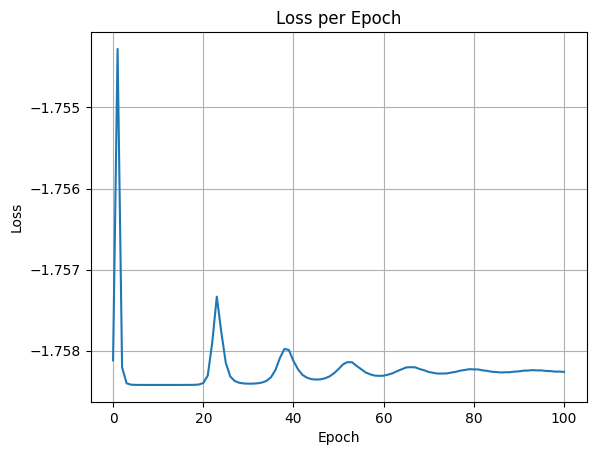

In [26]:
# Choose the optimizer
optimizer = 'rmsprop'

# Adagrad parameters
epsilon = 1e-8
grad_squared_sum = 0

# RMSprop parameters
rho = 0.9
grad_squared_avg = 0

# Adam parameters
beta1 = 0.9
beta2 = 0.999
m = 0  # First moment estimate
v = 0  # Second moment estimate
t = 0  # Time step

# Lists to store values for plotting
x_values = [x]
losses = [f(x)]

# Gradient descent loop
for epoch in range(epochs):
    gradient = f_prime(x)

    if optimizer == 'adagrad':
        grad_squared_sum += gradient**2
        adjusted_lr = alpha / (np.sqrt(grad_squared_sum) + epsilon)

    elif optimizer == 'rmsprop':
        grad_squared_avg = rho * grad_squared_avg + (1 - rho) * gradient**2
        adjusted_lr = alpha / (np.sqrt(grad_squared_avg) + epsilon)

    elif optimizer == 'adam':
        t += 1
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * gradient**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        adjusted_lr = alpha / (np.sqrt(v_hat) + epsilon)
        x -= adjusted_lr * m_hat
        loss = f(x)
        x_values.append(x)
        losses.append(loss)
        print(f'Epoch {epoch+1}: x = {x:.5f}, f(x) = {loss:.5f}, lr = {adjusted_lr:.5f}')
        continue

    # Update x
    x -= adjusted_lr * gradient
    loss = f(x)

    # Store values for plotting
    x_values.append(x)
    losses.append(loss)

    # Print the progress
    print(f'Epoch {epoch+1}: x = {x:.5f}, f(x) = {loss:.5f}, lr = {adjusted_lr:.5f}')

# Plotting the losses
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.grid(True)
plt.show()

Epoch 1: x = -1.39663, f(x) = -1.75824, lr = 0.15070
Epoch 2: x = -1.40386, f(x) = -1.75839, lr = 0.10415
Epoch 3: x = -1.40102, f(x) = -1.75842, lr = 0.09988
Epoch 4: x = -1.40203, f(x) = -1.75842, lr = 0.09937
Epoch 5: x = -1.40168, f(x) = -1.75842, lr = 0.09931
Epoch 6: x = -1.40180, f(x) = -1.75842, lr = 0.09930
Epoch 7: x = -1.40176, f(x) = -1.75842, lr = 0.09930
Epoch 8: x = -1.40178, f(x) = -1.75842, lr = 0.09930
Epoch 9: x = -1.40177, f(x) = -1.75842, lr = 0.09930
Epoch 10: x = -1.40177, f(x) = -1.75842, lr = 0.09930
Epoch 11: x = -1.40177, f(x) = -1.75842, lr = 0.09930
Epoch 12: x = -1.40177, f(x) = -1.75842, lr = 0.09930
Epoch 13: x = -1.40177, f(x) = -1.75842, lr = 0.09930
Epoch 14: x = -1.40177, f(x) = -1.75842, lr = 0.09930
Epoch 15: x = -1.40177, f(x) = -1.75842, lr = 0.09930
Epoch 16: x = -1.40177, f(x) = -1.75842, lr = 0.09930
Epoch 17: x = -1.40177, f(x) = -1.75842, lr = 0.09930
Epoch 18: x = -1.40177, f(x) = -1.75842, lr = 0.09930
Epoch 19: x = -1.40177, f(x) = -1.758

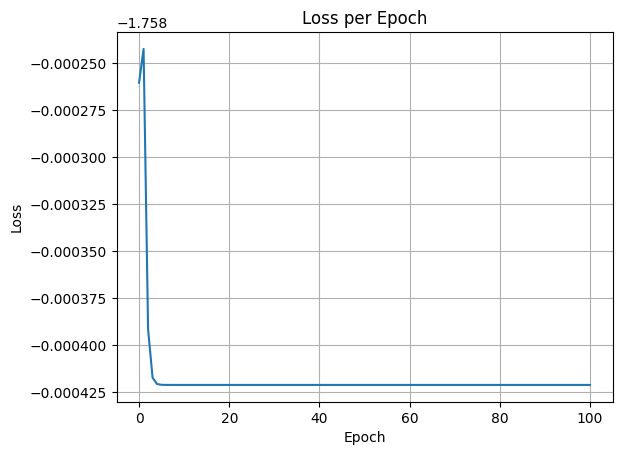

In [27]:
# Choose the optimizer
optimizer = 'adagrad'

# Adagrad parameters
epsilon = 1e-8
grad_squared_sum = 0

# RMSprop parameters
rho = 0.9
grad_squared_avg = 0

# Adam parameters
beta1 = 0.9
beta2 = 0.999
m = 0  # First moment estimate
v = 0  # Second moment estimate
t = 0  # Time step

# Lists to store values for plotting
x_values = [x]
losses = [f(x)]

# Gradient descent loop
for epoch in range(epochs):
    gradient = f_prime(x)

    if optimizer == 'adagrad':
        grad_squared_sum += gradient**2
        adjusted_lr = alpha / (np.sqrt(grad_squared_sum) + epsilon)

    elif optimizer == 'rmsprop':
        grad_squared_avg = rho * grad_squared_avg + (1 - rho) * gradient**2
        adjusted_lr = alpha / (np.sqrt(grad_squared_avg) + epsilon)

    elif optimizer == 'adam':
        t += 1
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * gradient**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        adjusted_lr = alpha / (np.sqrt(v_hat) + epsilon)
        x -= adjusted_lr * m_hat
        loss = f(x)
        x_values.append(x)
        losses.append(loss)
        print(f'Epoch {epoch+1}: x = {x:.5f}, f(x) = {loss:.5f}, lr = {adjusted_lr:.5f}')
        continue

    # Update x
    x -= adjusted_lr * gradient
    loss = f(x)

    # Store values for plotting
    x_values.append(x)
    losses.append(loss)

    # Print the progress
    print(f'Epoch {epoch+1}: x = {x:.5f}, f(x) = {loss:.5f}, lr = {adjusted_lr:.5f}')

# Plotting the losses
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.grid(True)
plt.show()